# Figures for casual plotting (DF)
This notebook contains casual plotting for general tasks regarding DF project. Now it's also used to make plots for review responses.

## General guidelines

- Figure organization
    - Figures will be organized under corresponding sections (h2 title). 
    - Subfigures (panels) will be under subsections (h3 title). 
    - Each subsection should be self-complete, meaning that to plot a certain figure, only the code in that specific section needs to be run, except importing packages (which should always be the first thing to run when starting the notebook.
- Ideas and plans that haven't been implemented should be listed in the **Plans** block, in <font color='blue'>blue color</font>.

## <font color='blue'> Plans

<font color='blue'>
    
- ...
</font>

## Table of content
1. Giant number fluctuation illustration
    - (a) plot $\Delta N/\sqrt N$ as a function of $N$
    - (b) ...

## 0 Packages

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from skimage import io
import typesetting.main as tm
# tm.prl('1-column-2-panel')
import os
from myImageLib import wowcolor
from corr_utils import *
from corrLib import *

In [11]:
color_dict, marker_list = unified_symbols() # keep color and symbol consistent across different plot, for same concentrations
data_master_dir = 'G:\\' # data folder: Google drive for now, but may change in the future
tm.prl('1-column-2-panel') # control the default plotting configurations, now I realize the parameters should vary from plot to plot
# dirs = data_log_mapping(kw='aug') # video info for GNF raw data, obtained from Aug 3rd to Aug 6th
# log_df = experiment_log()
n0_to_vf = 0.08

## 1 Giant number fluctuation illustration
### 1.1 (a) plot $\Delta N/\sqrt N$ as a function of $N$

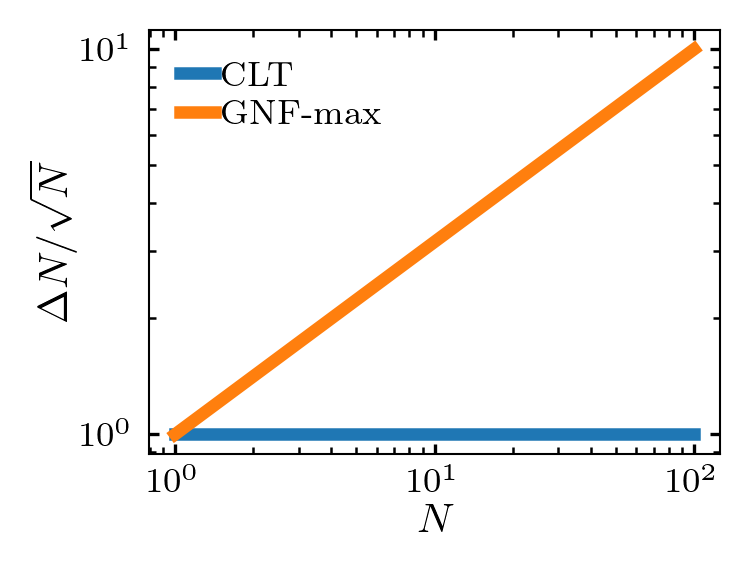

In [15]:
x = np.linspace(1, 100)
y1 = x ** 0
y2 = x ** 0.5

fig, ax = plt.subplots(figsize=(2.6, 2), dpi=300)
ax.plot(x, y1, lw=3, label='CLT')
ax.plot(x, y2, lw=3, label='GNF-max')
ax.loglog()

ax.set_xlabel('$N$')
ax.set_ylabel('$\Delta N/\sqrt N$')
ax.legend()
plt.tight_layout()

fig.savefig(r'E:\Github\PhD-thesis\Figs\1-Intro\GNF\GNF-illustration.pdf')

## 2 Science Advances report response figures

### 2.1 $\Delta \phi$ vs. $l$

Following the suggestion, we have plotted the standard deviation of the local volume fraction $\Delta \phi = \Delta N V_b / V $ versus $l$ for bacterial suspensions of different concentrations (Fig. R2), where $V_b \approx 1$ $\mu$m$^3$ is the volume of bacteria and $V = l^2d$ is the volume of the subsystem.

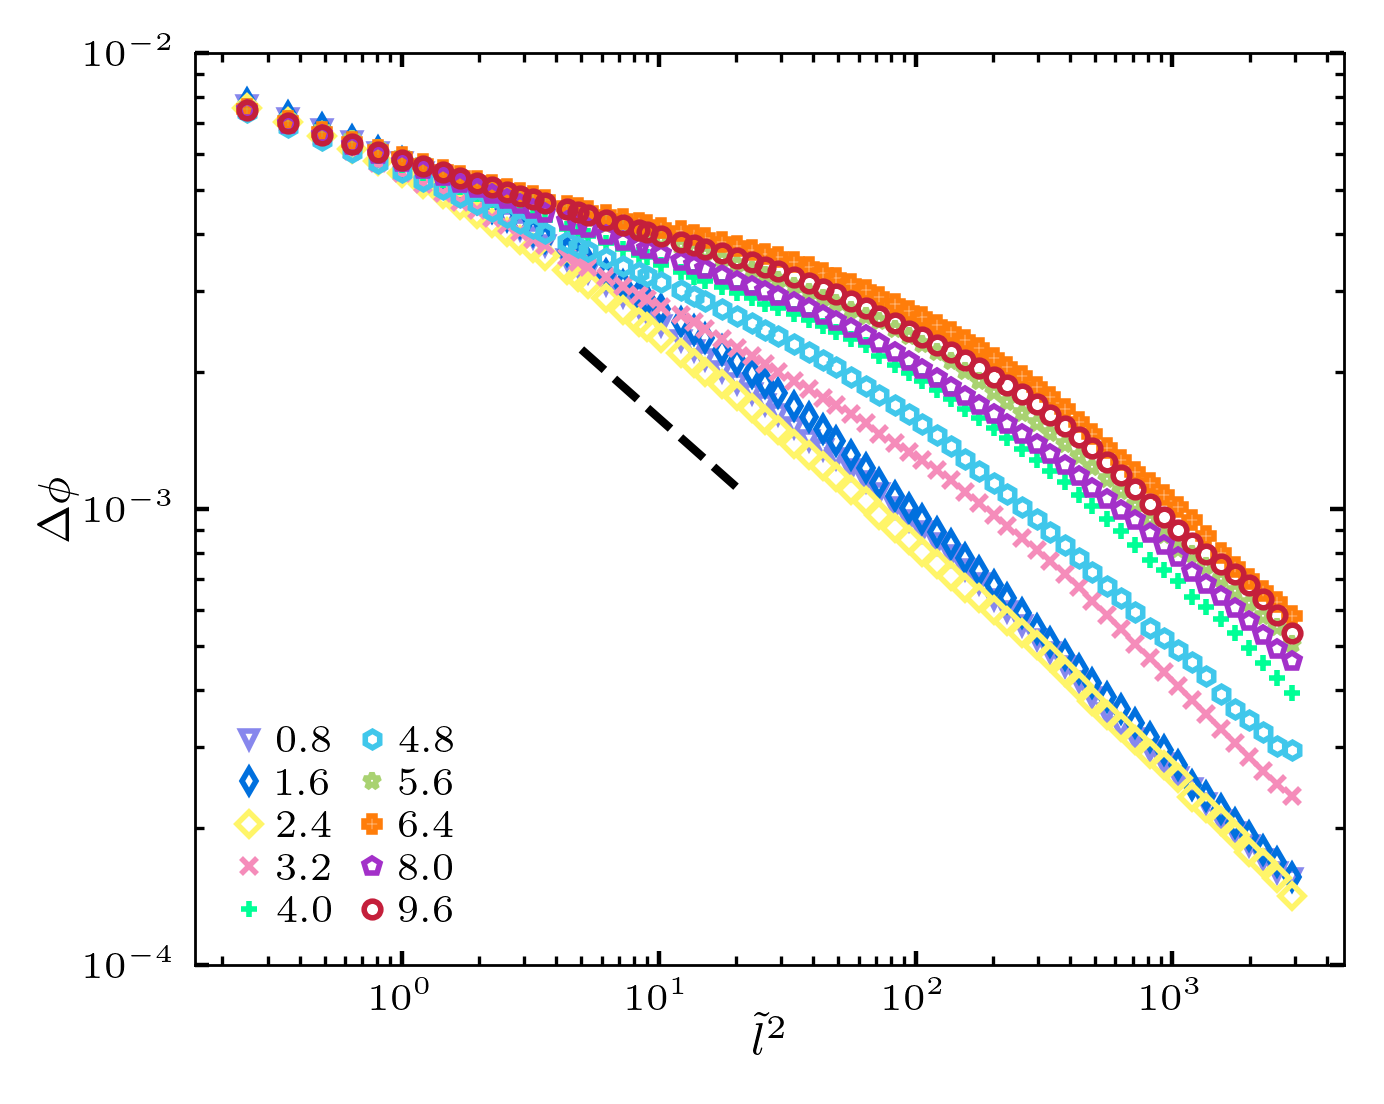

In [24]:
# out_folder = 'transient-GNF-energy-dN'
vb = 1 # um^3
lb = 3 # um
d = 140 # um
data_list = []
for file in ['GNF-0.csv', 'GNF-1.csv', 'GNF-2.csv']:
    data_gnf = pd.read_csv(os.path.join('/home/zhengyang/Documents/Google Drive/Documents/DF/data/transient-GNF-energy-dN/GNF', file)).set_index('l_r')
    data_list.append(data_gnf)
master = pd.concat(data_list, keys=[0, 1, 2], axis=1).mean(level=1, axis=1)
master = master[0.25:]

fig, ax = plt.subplots(figsize=(3.5, 2.8))

# phi=0 data
# folder = r'E:\moreData\08032020\df2_kinetics\12'
# data = pd.read_csv(os.path.join(folder, r'kinetics_data.csv'))
# x, y = postprocess_gnf(data, lb=10, xlim=[0.25, 5], normalize='1')
# ax.plot(x, y*4, 
#          mec='gray', mfc=(0,0,0,0), markersize=3, mew=1, marker=marker_list[color_dict['0']], ls='',
#        label='0.0')

for str_c in master:
    if str_c != '85': # don't plot 85 data
        ax.plot(master.index, master[str_c] * vb / (master.index * lb ** 2 * d) ,
               mec=wowcolor(color_dict[str_c]), marker=marker_list[color_dict[str_c]], mfc=(0,0,0,0), mew=1,
               markersize=3, ls='', label='{:.1f}'.format(int(str_c)*n0_to_vf))
ax.legend(loc='lower left', ncol=2, fontsize=7)
ax.set_xlabel('$\\tilde{l}$$^2$')
ax.set_ylabel('$\Delta \phi$')
# ax.set_yticks([1, 2, 3, 4, 6])
# ax.set_yticklabels(['1', '2', '3', '4', '6'])
ax.loglog()       


# 0.83 and 0.5 slopes
# x = np.array([1, 8])
# plt.plot(x, 15*x**0.83, ls='--', color='black')
# x = np.array([300, 2000])
# plt.plot(x, 70*x**0.5, ls='--', color='black')
# x = np.array([0.25, 2800])
# plt.plot(x, 2*x**0.52, ls='--', color='black', lw=0.5)

# 0.33 slope
x = np.array([5, 20])
plt.plot(x, 5e-3*x**-0.5, ls='--', color='black')
# ax.set_xticks([1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
ax.set_yticks([1e-4, 1e-3, 1e-2])
# ax.set_yticklabels([5, 10, 20, 30, 40])
plt.tight_layout()
fig.savefig('/home/zhengyang/Pictures/dphi-l.pdf')

### 2.2 Density-velocity cross-correlation

comparison between granular flows and active fluids, in terms of the cross-correlation between density and velocity. 

In [31]:
piv_folder = '/home/zhengyang/data/DF/piv_imseq/00'
img_folder = '/home/zhengyang/data/DF/small_imseq/00'

l_piv = readdata(piv_folder, 'csv')
stack = np.load(os.path.join(img_folder, 'stack.npy'))

c_list = []
for num, i in l_piv.iterrows():
    X, Y, U, V = read_piv(i.Dir)
    v = (U ** 2 + V ** 2) ** 0.5
    frame = int(i.Name.split('-')[0])
    img = stack[frame]
    c = corr2d(v, img)
    c_list.append(-c)

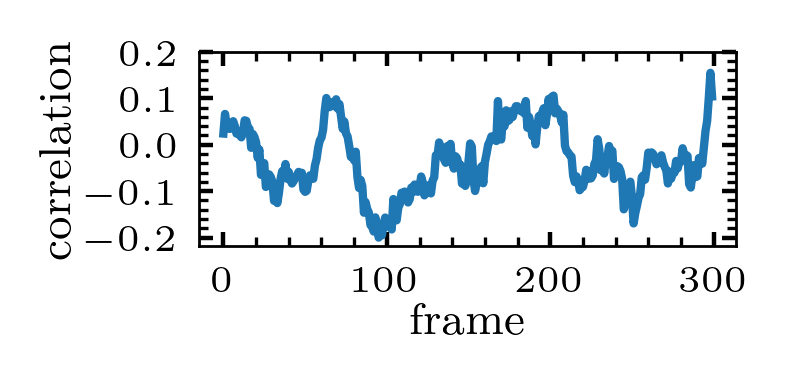

In [56]:
fig, ax = plt.subplots(figsize=(2, 1))
ax.plot(c_list)
ax.set_yticks([-.2, -.1, 0, .1, .2])
ax.set_xticks([0, 100, 200, 300])
ax.set_xlabel('frame')
ax.set_ylabel('correlation')
plt.tight_layout()
fig.savefig('/home/zhengyang/Pictures/DF/nxv.pdf')

In [49]:
np.array(c_list).mean()

-0.03365782706003089